In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
#Read the data
data1 = pd.read_csv("50_Startups.csv")
data1.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RD_Spend         50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.8+ KB


In [4]:
#check for missing values
data1.isna().sum()

RD_Spend           0
Administration     0
Marketing_Spend    0
State              0
Profit             0
dtype: int64

In [5]:
#Correlation Matirx
data1.corr()

,RD_Spend,Administration,Marketing_Spend,Profit
RD_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


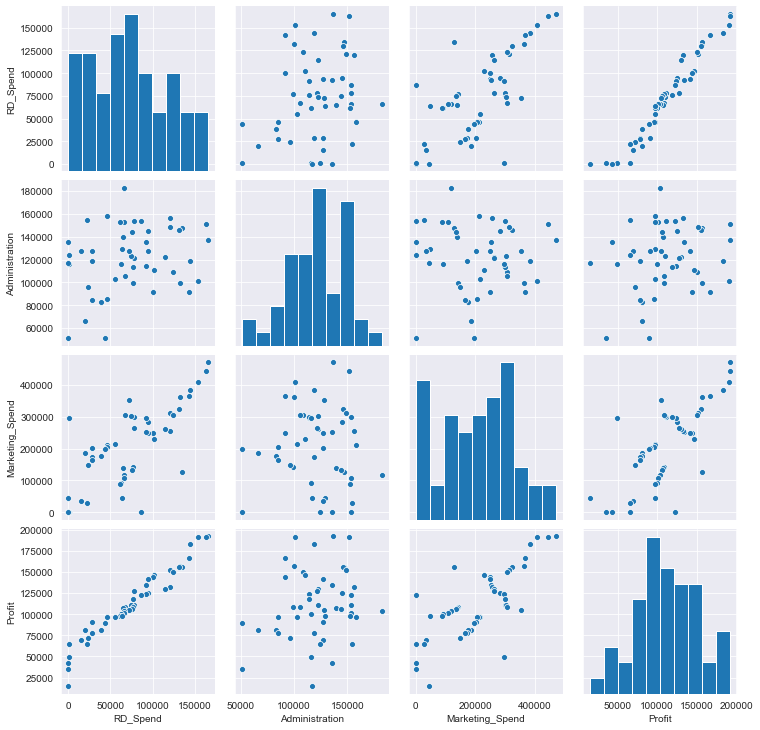

In [6]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(data1)

In [7]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Administration~Profit+RD_Spend++Marketing_Spend+State',data=data1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Administration   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     1.627
Date:                Fri, 16 Apr 2021   Prob (F-statistic):              0.173
Time:                        14:25:10   Log-Likelihood:                -578.23
No. Observations:                  50   AIC:                             1168.
Df Residuals:                      44   BIC:                             1180.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.278e+05   2.22e+04      5.746      0.000    8.29e+04    1.73e+05
State[T.Florida]   2179.3538   9695.120      0.225      0.823   -1.74e+04    2.17e+04
State[T.New York]  -832.5140   9368.650     -0.089      0.930   -1.97e+04     1.8e+04
Profit               -0.2236      0.432     -0.517      0.608      -1.095       0.648
RD_Spend              0.5218      0.366      1.426      0.161      -0.216       1.259
Marketing_Spend      -0.0960      0.049     -1.975      0.055      -0.194       0.002
==============================================================================
Omnibus:                        1.805   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.406   Jarque-Bera (JB):                1.413
Skew:                          -0.412   Prob(JB):                        0.493
Kurtosis:                       2.973   Cond. No.                     1.64e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
#Coefficients
model.params

Intercept            127755.596492
State[T.Florida]       2179.353797
State[T.New York]      -832.513953
Profit                   -0.223606
RD_Spend                  0.521821
Marketing_Spend          -0.095951
dtype: float64

In [9]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept            5.745712
State[T.Florida]     0.224789
State[T.New York]   -0.088862
Profit              -0.517012
RD_Spend             1.426004
Marketing_Spend     -1.974712
dtype: float64 
 Intercept            7.968858e-07
State[T.Florida]     8.231843e-01
State[T.New York]    9.295951e-01
Profit               6.077373e-01
RD_Spend             1.609241e-01
Marketing_Spend      5.459691e-02
dtype: float64


In [10]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.15606188633869966, 0.06015982796809749)

In [11]:
#Simple Linear Regression Models

ml_k=smf.ols('Administration~Marketing_Spend',data = data1).fit()  
#t and p-Values
print(ml_k.tvalues, '\n', ml_k.pvalues)
ml_k.summary()

Intercept          15.284020
Marketing_Spend    -0.222884
dtype: float64 
 Intercept          4.533446e-20
Marketing_Spend    8.245717e-01
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Administration   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                   0.04968
Date:                Fri, 16 Apr 2021   Prob (F-statistic):              0.825
Time:                        14:25:10   Log-Likelihood:                -582.45
No. Observations:                  50   AIC:                             1169.
Df Residuals:                      48   BIC:                             1173.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.229e+05   8041.026     15.284      0.000    1.07e+05    1.39e+05
Marketing_Spend    -0.0074      0.033     -0.223      0.825      -0.074       0.059
==============================================================================
Omnibus:                        2.883   Durbin-Watson:                   1.578
Prob(Omnibus):                  0.237   Jarque-Bera (JB):                2.185
Skew:                          -0.507   Prob(JB):                        0.335
Kurtosis:                       3.147   Cond. No.                     4.89e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
ml_k=smf.ols('Administration~Profit',data = data1).fit()  
#t and p-Values
print(ml_k.tvalues, '\n', ml_k.pvalues)
ml_k.summary()

Intercept    9.045265
Profit       1.419493
dtype: float64 
 Intercept    6.083995e-12
Profit       1.622174e-01
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Administration   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Fri, 16 Apr 2021   Prob (F-statistic):              0.162
Time:                        14:25:10   Log-Likelihood:                -581.44
No. Observations:                  50   AIC:                             1167.
Df Residuals:                      48   BIC:                             1171.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.057e+05   1.17e+04      9.045      0.000    8.22e+04    1.29e+05
Profit         0.1395      0.098      1.419      0.162      -0.058       0.337
==============================================================================
Omnibus:                        0.990   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.610   Jarque-Bera (JB):                0.930
Skew:                          -0.314   Prob(JB):                        0.628
Kurtosis:                       2.772   Cond. No.                     3.54e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
ml_w=smf.ols('Administration~Profit+Marketing_Spend',data = data1).fit()  
print(ml_w.tvalues, '\n', ml_w.pvalues) 
ml_w.summary()

Intercept          8.822242
Profit             2.467779
Marketing_Spend   -2.000956
dtype: float64 
 Intercept          1.554556e-11
Profit             1.729198e-02
Marketing_Spend    5.119098e-02
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Administration   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     3.072
Date:                Fri, 16 Apr 2021   Prob (F-statistic):             0.0557
Time:                        14:25:10   Log-Likelihood:                -579.40
No. Observations:                  50   AIC:                             1165.
Df Residuals:                      47   BIC:                             1171.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.016e+05   1.15e+04      8.822      0.000    7.85e+04    1.25e+05
Profit              0.3544      0.144      2.468      0.017       0.065       0.643
Marketing_Spend    -0.0947      0.047     -2.001      0.051      -0.190       0.001
==============================================================================
Omnibus:                        1.547   Durbin-Watson:                   1.679
Prob(Omnibus):                  0.461   Jarque-Bera (JB):                1.374
Skew:                          -0.395   Prob(JB):                        0.503
Kurtosis:                       2.812   Cond. No.                     8.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
#Calculating VIF


rsq_sp = smf.ols('RD_Spend~Profit+Marketing_Spend+State',data=data1).fit().rsquared  
vif_sp = 1/(1-rsq_sp) # 16.33

rsq_pr = smf.ols('Profit~RD_Spend+Marketing_Spend+State',data=data1).fit().rsquared  
vif_pr = 1/(1-rsq_pr) # 564.98

rsq_ms = smf.ols('Marketing_Spend~Profit+RD_Spend',data=data1).fit().rsquared  
vif_ms = 1/(1-rsq_ms) #  564.84

#rsq_st = smf.ols('State~Profit+MarketingSpend+Spend',data=startup).fit().rsquared  
#vif_st = 1/(1-rsq_st) #  16.35


# Storing vif values in a data frame
d1 = {'Variables':['RD_Spend','Profit','Marketing_Spend'],'VIF':[vif_sp,vif_pr,vif_ms]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RD_Spend,18.738908
1,Profit,20.182981
2,Marketing_Spend,2.269383


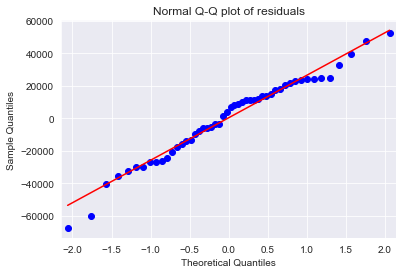

In [15]:
#Residual Analysis
#Test for Normality of Residuals (Q-Q Plot)

import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [16]:
#list(np.where(final_ml_V.resid>10))

In [17]:
#plt.hist(final_ml_V.resid)

In [18]:
#Residual Plot for Homoscedasticity
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

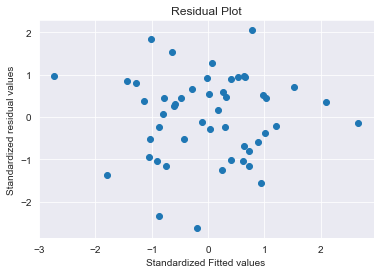

In [19]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

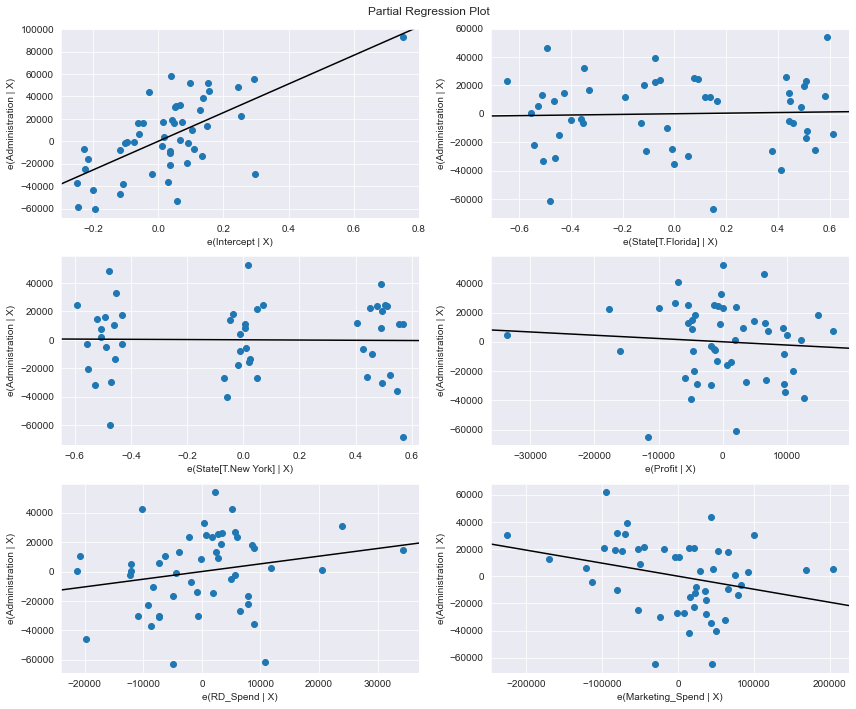

In [20]:
#Residual Vs Regressors
fig = plt.figure(figsize=(12,10))
fig = sm.graphics.plot_partregress_grid(model,fig=fig)
plt.show()

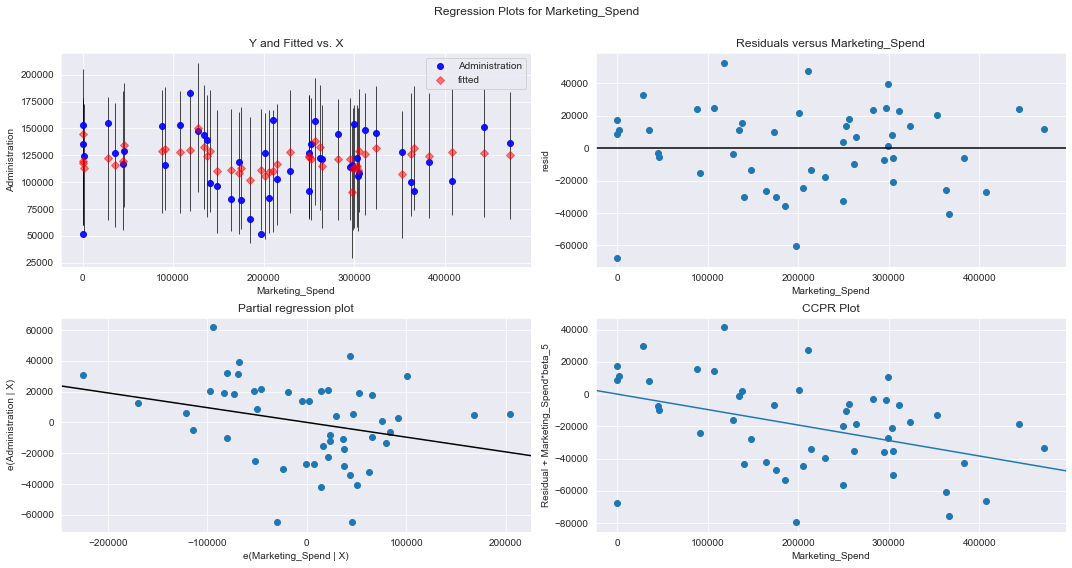

In [21]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing_Spend", fig=fig)
plt.show()

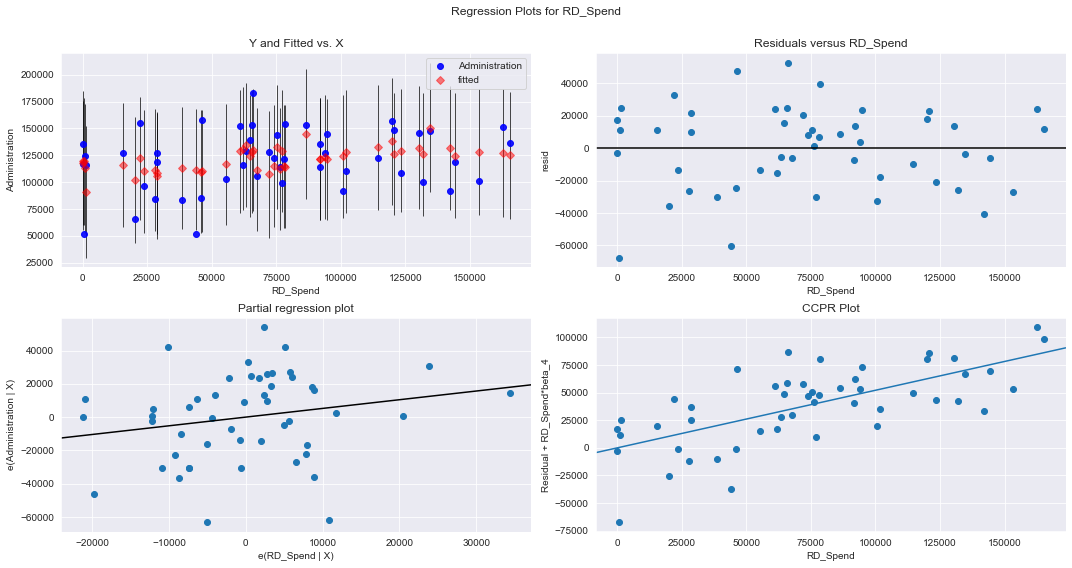

In [22]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RD_Spend", fig=fig)
plt.show()

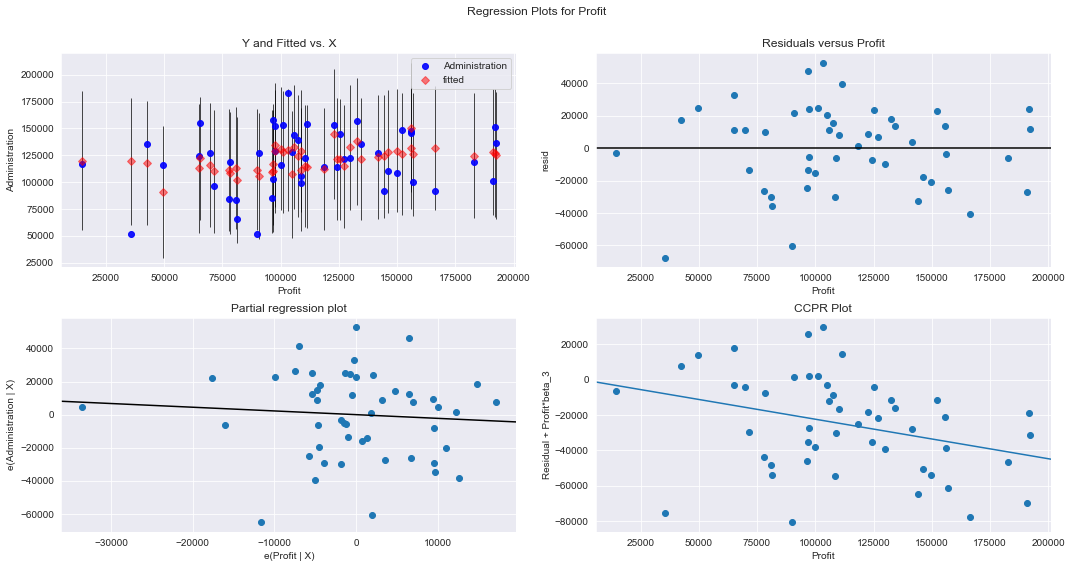

In [23]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Profit", fig=fig)
plt.show()

In [24]:
#Model Deletion Diagnostics
#Detecting Influencers/Outliers
#Cook’s Distance

model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

<ipython-input-25-66cafdb6996e>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(data1)), np.round(c, 3))


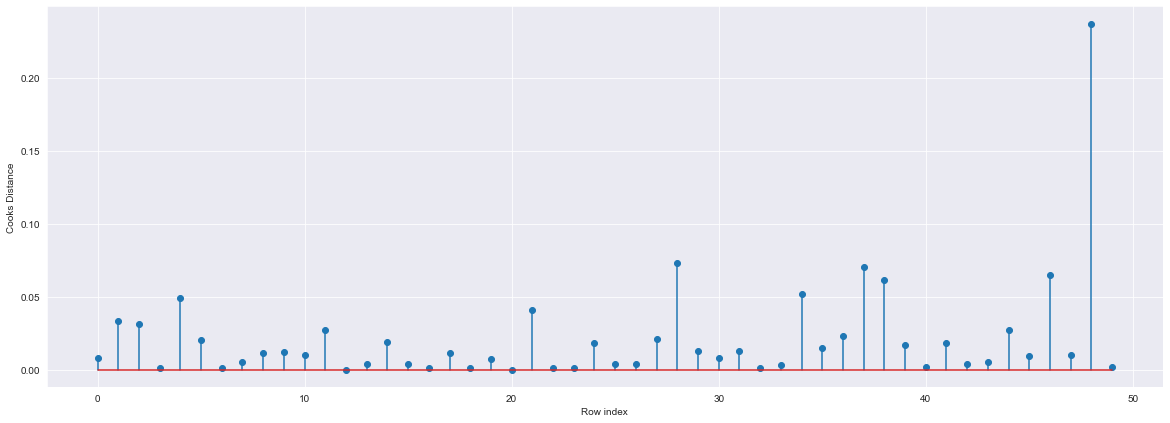

In [25]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [26]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(48, 0.23679886068270337)

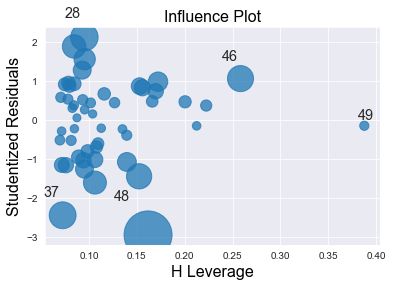

In [27]:
#High Influence points
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [28]:
k = data1.shape[1]
n = data1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

In [29]:
data1[data1.index.isin([43, 48])]

,RD_Spend,Administration,Marketing_Spend,State,Profit
43,15505.73,127382.30,35534.17,New York,69758.98
48,542.05,51743.15,0.00,New York,35673.41


In [30]:
#See the differences in HP and other variable values
data1.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [31]:
#Improving the model

#Load the data
data_new = pd.read_csv("50_Startups.csv")

In [32]:
#Discard the data points which are influencers and reasign the row number (reset_index())
data2 = data_new.drop(data_new.index[[43,47]],axis=0).reset_index()

In [33]:
#Drop the original index
data2=data2.drop(['index'],axis=1)
data2

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [34]:
#Exclude variable "Profit" and generate R-Squared and AIC values
final_ml_V= smf.ols('Administration~Marketing_Spend+RD_Spend',data = data1).fit()
#pred=final_ml_V.predict(car1)
#actual=car1.MPG
#errors=actual-pred
#errors.mean()
#rmse=np.sqrt(np.mean(errors**2))
#rmse

In [35]:
final_ml_V.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Administration   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     4.115
Date:                Fri, 16 Apr 2021   Prob (F-statistic):             0.0226
Time:                        14:25:23   Log-Likelihood:                -578.44
No. Observations:                  50   AIC:                             1163.
Df Residuals:                      47   BIC:                             1169.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.173e+05   7749.035     15.141      0.000    1.02e+05    1.33e+05
Marketing_Spend    -0.0999      0.045     -2.235      0.030      -0.190      -0.010
RD_Spend            0.3405      0.119      2.859      0.006       0.101       0.580
==============================================================================
Omnibus:                        1.684   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.431   Jarque-Bera (JB):                1.351
Skew:                          -0.401   Prob(JB):                        0.509
Kurtosis:                       2.936   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Administration   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     1.627
Date:                Fri, 16 Apr 2021   Prob (F-statistic):              0.173
Time:                        14:25:23   Log-Likelihood:                -578.23
No. Observations:                  50   AIC:                             1168.
Df Residuals:                      44   BIC:                             1180.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.278e+05   2.22e+04      5.746      0.000    8.29e+04    1.73e+05
State[T.Florida]   2179.3538   9695.120      0.225      0.823   -1.74e+04    2.17e+04
State[T.New York]  -832.5140   9368.650     -0.089      0.930   -1.97e+04     1.8e+04
Profit               -0.2236      0.432     -0.517      0.608      -1.095       0.648
RD_Spend              0.5218      0.366      1.426      0.161      -0.216       1.259
Marketing_Spend      -0.0960      0.049     -1.975      0.055      -0.194       0.002
==============================================================================
Omnibus:                        1.805   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.406   Jarque-Bera (JB):                1.413
Skew:                          -0.412   Prob(JB):                        0.493
Kurtosis:                       2.973   Cond. No.                     1.64e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.1490020823951752, 1162.8759780651217)

In [38]:
#Exclude variable "VOL" and generate R-Squared and AIC values
final_ml_W= smf.ols('Administration~Profit+RD_Spend',data = data1).fit()
(final_ml_W.rsquared,final_ml_W.aic)

(0.08103994699315131, 1166.71762666242)

In [39]:
#Comparing above R-Square and AIC values, model 'final_ml_V' has high R- square and low AIC value hence include variable 'VOL' 
#so that multi collinearity problem would be resolved

In [40]:
#Cook’s Distance

model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

<ipython-input-41-0004b750c695>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(data1)),np.round(c_V,3));


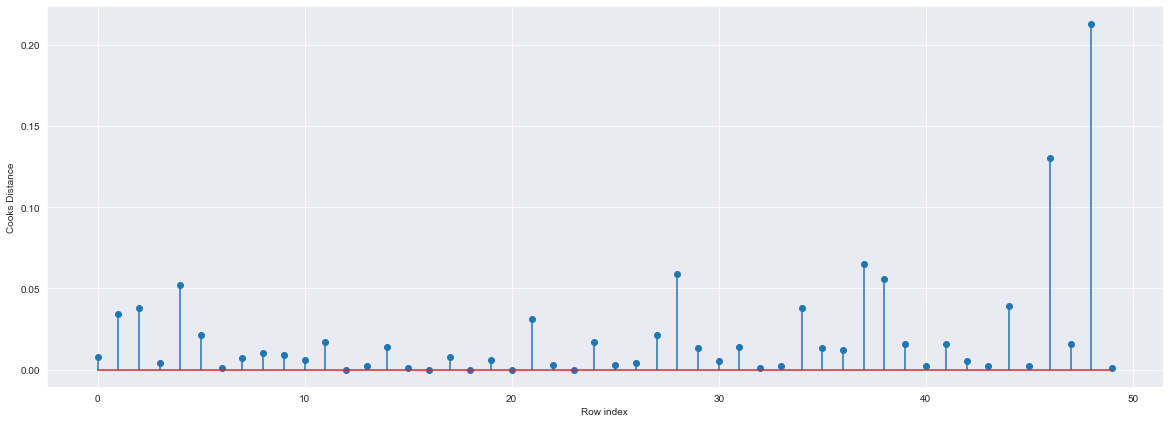

In [41]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [42]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(48, 0.21273995808987073)

In [43]:
#Drop 76 and 77 observations
data3=data2.drop(data2.index[[46,47]],axis=0)
data3

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [44]:
#Reset the index and re arrange the row values
data4=data3.reset_index()
data5=data4.drop(['index'],axis=1)
data5

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [45]:
#Build the model on the new data
final_ml_V= smf.ols('Administration~Marketing_Spend+Profit+RD_Spend',data = data4).fit()

In [46]:
#Again check for influencers
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

<ipython-input-47-5b66c4cc1bd5>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(data5)),np.round(c_V,3));


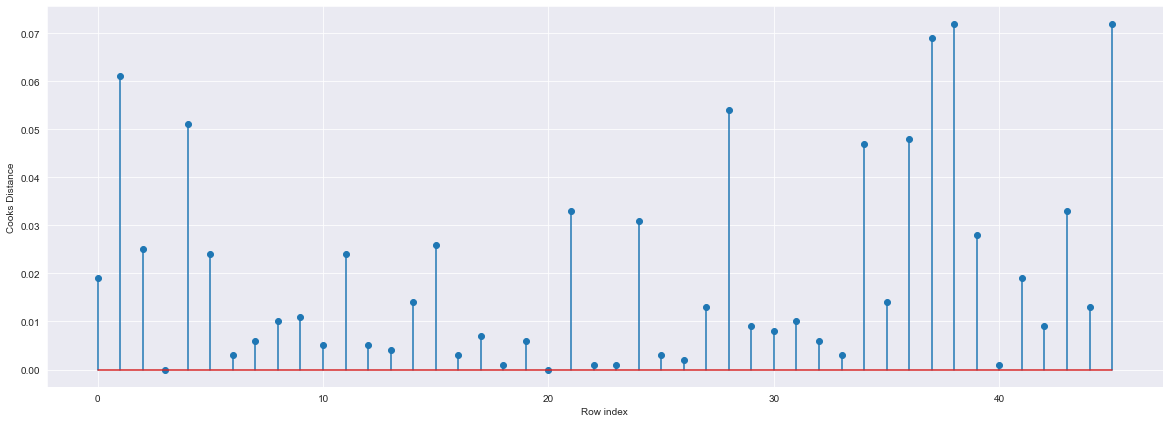

In [47]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data5)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [48]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(45, 0.07222214020035136)

In [49]:
#Since the value is <1 , we can stop the diagnostic process and finalize the model

In [50]:
#Check the accuracy of the mode
final_ml_V= smf.ols('Administration~Marketing_Spend+Profit+RD_Spend',data = data4).fit()
final_ml_V.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Administration   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     3.503
Date:                Fri, 16 Apr 2021   Prob (F-statistic):             0.0235
Time:                        14:25:25   Log-Likelihood:                -529.34
No. Observations:                  46   AIC:                             1067.
Df Residuals:                      42   BIC:                             1074.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.584e+05   2.82e+04      5.628      0.000    1.02e+05    2.15e+05
Marketing_Spend    -0.0942      0.045     -2.071      0.045      -0.186      -0.002
Profit             -0.7066      0.516     -1.369      0.178      -1.749       0.335
RD_Spend            0.8655      0.413      2.097      0.042       0.033       1.698
==============================================================================
Omnibus:                        0.555   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.758   Jarque-Bera (JB):                0.604
Skew:                          -0.240   Prob(JB):                        0.739
Kurtosis:                       2.710   Cond. No.                     2.22e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
data4.head()

,index,RD_Spend,Administration,Marketing_Spend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94


In [52]:
fitted=final_ml_V.predict(data4)
resid=data5.Administration-fitted
resid.mean()

-1.2653839329014653e-10

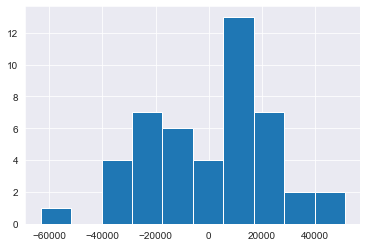

In [53]:
resid.hist()

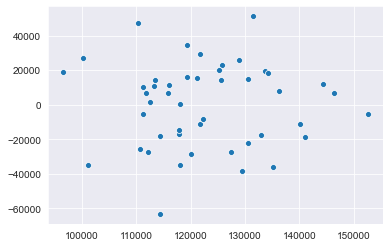

In [54]:
#import seaborn as sns

sns.scatterplot(fitted,resid)

In [55]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.2001207710127587, 1066.6842670073888)

In [56]:
#Predicting for new data

#New data for prediction
new_data=pd.DataFrame({'RD_Spend':162590,"Marketing_Spend":443890,"Profit":191790},index=[1])

In [57]:
final_ml_V.predict(new_data)

1    121825.859188
dtype: float64

In [58]:
final_ml_V.predict(data_new.iloc[0:5,])

0    121253.772927
1    121830.264348
2    117816.564739
3    118054.786589
4    129509.120567
dtype: float64

In [59]:
pred_y = final_ml_V.predict(data_new)
pred_y

0     121253.772927
1     121830.264348
2     117816.564739
3     118054.786589
4     129509.120567
5     127465.340805
6     152591.764359
7     130645.176476
8     125858.937870
9     130632.665165
10    121803.317778
11    120107.071478
12    116095.354781
13    119352.786475
14    144385.546888
15    141097.200153
16    111322.955157
17    125157.905770
18    122258.398841
19    146470.106569
20    112588.626005
21    119396.201116
22    115934.186165
23    111348.571540
24    135170.397755
25    125513.540429
26    136292.091670
27    113381.845055
28    131492.378291
29    133752.647667
30    132888.799582
31    134154.580167
32    140128.178548
33    117865.108499
34    110425.223397
35    110730.658468
36    100206.357926
37    114462.092818
38    101098.896084
39    118086.416574
40    111763.223554
41    112113.314475
42    114436.344870
43    119215.332475
44    128889.017915
45    113243.285263
46     96624.788432
47    128362.004978
48    133697.323265
49    143808.382807


In [60]:
# split the data into train and test

from sklearn.model_selection import train_test_split

train_data,test_data=train_test_split(data5,test_size=0.3)
test_data

,RD_Spend,Administration,Marketing_Spend,State,Profit
28,66051.52,182645.56,118148.20,Florida,103282.38
13,91992.39,135495.07,252664.93,California,134307.35
8,120542.52,148718.95,311613.29,New York,152211.77
16,78013.11,121597.55,264346.06,California,126992.93
24,77044.01,99281.34,140574.81,New York,108552.04
12,93863.75,127320.38,249839.44,Florida,141585.52
0,165349.20,136897.80,471784.10,New York,192261.83
7,130298.13,145530.06,323876.68,Florida,155752.60
9,123334.88,108679.17,304981.62,California,149759.96
45,1315.46,115816.21,297114.46,Florida,49490.75


In [61]:
train_data

,RD_Spend,Administration,Marketing_Spend,State,Profit
27,72107.60,127864.55,353183.81,New York,105008.31
6,134615.46,147198.87,127716.82,California,156122.51
26,75328.87,144135.98,134050.07,Florida,105733.54
23,67532.53,105751.03,304768.73,Florida,108733.99
43,22177.74,154806.14,28334.72,California,65200.33
5,131876.90,99814.71,362861.36,New York,156991.12
41,27892.92,84710.77,164470.71,Florida,77798.83
33,55493.95,103057.49,214634.81,Florida,96778.92
31,61136.38,152701.92,88218.23,New York,97483.56
18,91749.16,114175.79,294919.57,Florida,124266.90


In [62]:
def RMSE(pred,actual):
    return np.sqrt(np.mean((actual-pred)**2))

In [63]:
#train the model using training data
train_model=smf.ols("Administration~np.log(RD_Spend)+Profit+Marketing_Spend",data= train_data).fit()
predtrain=train_model.predict(train_data)
actualtrain=train_data.Administration
errors_train=predtrain-actualtrain
rmse_train=RMSE(predtrain,actualtrain)
round(rmse_train,4)

24904.3824

In [64]:
predtest=train_model.predict(test_data)
actualtest=test_data.Administration

rmse_test=RMSE(predtest,actualtest)
rmse_test

54304.289024847945